<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_Linear_Classification_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Creating Model**
This goes with lecture "Classification Notebook"

In [ ]:
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Alternative
# model = tf.keras.models.Sequential()
# model.add.(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 1.3698 - accuracy: 0.2651 - val_loss: 1.3359 - val_accuracy: 0.2287
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.2460 - accuracy: 0.3018 - val_loss: 1.2067 - val_accuracy: 0.2606
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1300 - accuracy: 0.3333 - val_loss: 1.0859 - val_accuracy: 0.3032
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0193 - accuracy: 0.3648 - val_loss: 0.9769 - val_accuracy: 0.3617
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9211 - accuracy: 0.4199 - val_loss: 0.8763 - val_accuracy: 0.4202
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.4856 - val_loss: 0.7856 - val_accuracy: 0.4894
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7503 - accuracy: 0.5538 - val_loss: 0.7063 - val_accuracy: 0.5745
Epoch 8/100


In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9685
Train score: [0.1240861639380455, 0.9685039520263672]
6/6 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9894
Test score: [0.08082296699285507, 0.9893617033958435]


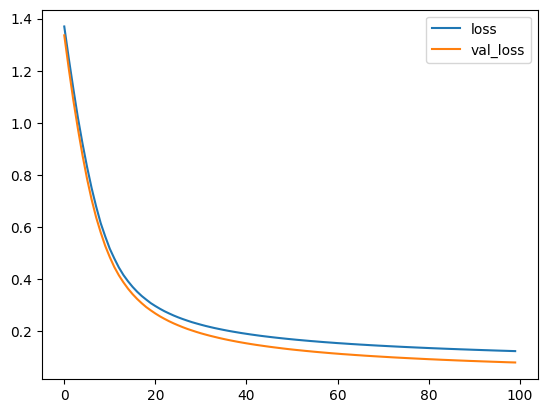

In [ ]:
# Plot the loss and accuracy for epoch
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

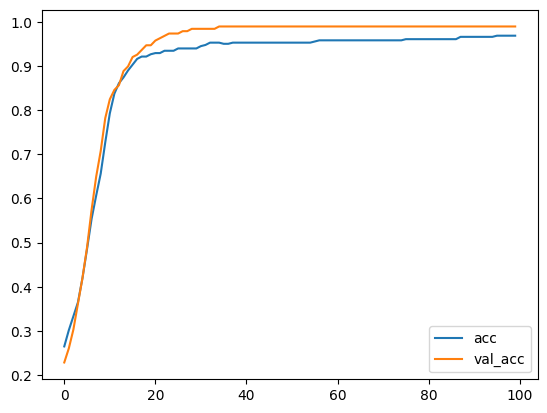

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

# **Part 2: Making Predictions**
This goes with the lecture "Making Predictions"

In [ ]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probablities p(y = 1 | x)

6/6 [==============================] - 0s 1ms/step
[[6.7844419e-03]
 [8.4686702e-01]
 [9.9617207e-01]
 [1.4581754e-05]
 [9.1299415e-01]
 [3.2856783e-01]
 [9.9640828e-01]
 [3.5569023e-02]
 [9.5913905e-01]
 [1.2195920e-02]
 [9.8025733e-01]
 [9.8417425e-01]
 [9.1302431e-01]
 [9.8507929e-01]
 [9.8204994e-01]
 [9.3617994e-01]
 [9.7263402e-01]
 [8.5251296e-01]
 [9.3389547e-01]
 [9.9220616e-01]
 [9.9153763e-01]
 [9.7660071e-01]
 [2.4430550e-05]
 [9.9732488e-01]
 [2.8094211e-01]
 [9.6075171e-01]
 [3.2782704e-02]
 [9.7117352e-01]
 [6.3449502e-02]
 [2.1394791e-02]
 [9.9841654e-01]
 [9.9592996e-01]
 [9.3747741e-01]
 [9.8637986e-01]
 [7.4101770e-01]
 [9.9922472e-01]
 [9.3776184e-01]
 [9.9963087e-01]
 [9.5818257e-01]
 [9.9948663e-01]
 [3.2276302e-03]
 [8.8429844e-01]
 [4.1432315e-01]
 [8.2243127e-01]
 [8.7826508e-01]
 [9.5012683e-01]
 [1.1274908e-03]
 [1.8026128e-01]
 [9.9660283e-01]
 [9.4763654e-01]
 [1.7187524e-01]
 [4.6999048e-02]
 [9.8939919e-01]
 [7.2455239e-01]
 [9.4366926e-01]
 [1.7449944e-0

In [ ]:
# Round to get the actual predictions
# Flatten since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [ ]:
# Calculate the accuracy, compare it to evaluate()
print("Manually calculated accuaracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

# **Part 3: Saving and Loading a Model**
This goes with the lecture "Saving and Loading a Model"

In [ ]:
# Save model to a file
model.save('linearclassifier.h5')

In [ ]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Jul 29 21:12 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jul 27 13:37 sample_data


In [ ]:
# Load the model and see if it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# Hence, make sure you define the model with ONLY Dense(1, input_shape=(D,)) until the bug is fixed

model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9894


[0.08082296699285507, 0.9893617033958435]